<a href="https://colab.research.google.com/github/Melquisadec/analise-aibnb/blob/main/desafio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projeto prático de anuncios do Airbnb Rio de Janeiro**
Este projeto tem como objetivo realizar a limpeza, transformação e análise de dados de anúncios do Airbnb no Rio de Janeiro. A ideia é aplicar técnicas de manipulação de dados para entender melhor o mercado de hospedagem, identificar padrões e tendências e preparar os dados para futuras análises ou modelagem preditiva.
A Etapa 1 Consiste na importação das bibliotecas e importação das bases de dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/dataclean/'

In [6]:
df_listings = pd.read_csv(path + 'listings_cleaned.csv')
df_reviews = pd.read_csv(path + 'reviews.csv')

Após importar as duas bases verificar as primeiras linhas do data frame para verifiar o processo de importação e em seguida juntar as duas bases de dados para trabalhar com um único data set

In [26]:
df_listings.head(5)

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0
3,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0


In [27]:
df_listings.isna().sum()

,0
id,0
neighbourhood_cleansed,0
room_type,0
accommodates,0
bathrooms,2890
bedrooms,523
beds,2869
price,2855


In [25]:
df_reviews.head(5)

,id,number_of_reviews,review_scores_rating
0,272335,367,4.92
1,272631,32,5.00
2,273363,5,5.00
3,273463,654,4.83
4,273496,60,4.80


In [32]:
df_final = pd.merge(df_listings, df_reviews, on='id', how='inner')
df_final.head(2)

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0,367,4.92
1,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32,5.00


## **Etapa 2 Limpeza e Tratamento de Dados **
Aqui, os dados são analisados para lidar com valores ausentes e inconsistências. O tratamento pode incluir a remoção de colunas irrelevantes e o preenchimento de valores nulos.


In [33]:
df_final.isnull().sum()

,0
id,0
neighbourhood_cleansed,0
room_type,0
accommodates,0
bathrooms,0
bedrooms,0
beds,0
price,0
number_of_reviews,0
review_scores_rating,0


Note que nenhuma coluna do dataset possui valores ausentes e todas esta colunas parecem ser significativa para uma análise de acomodação, logo não faz sentido remover nenhuma delas.

## **Tratando e Visualizando Outliers**

Outliers podem afetar negativamente as análises, especialmente em variáveis como `price`. Para identificá-los, utilize gráficos como o `boxplot`.

Depois da identificação, vamos aplicar o método do **IQR (Intervalo Interquartil)** para definir os limites aceitáveis e remover os registros com valores fora do intervalo esperado.

Nesta parte de tratamento vamos realizar umd describe para verificar a distribuição básica dos nossos dados, olhar estas descritivas principalmente o máximo de cada variável pode nos dar uma leve ideia de quais variáveis possa haver outlier e logo após podemos fazer os boxplot para obter uma resposta visual rápida se existe ou não outliers na base.

In [11]:
(df_final.select_dtypes(include='number').describe()).round(2)


,id,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
count,3.269500e+04,32695.00,32695.00,32695.00,32695.00,32695.00,32695.00,32695.00
mean,6.936934e+17,3.76,1.39,1.42,2.19,782.97,24.13,4.82
std,5.187758e+17,1.96,0.74,0.87,1.68,522.34,46.39,0.30
min,1.787800e+04,1.00,0.00,0.00,0.00,33.00,0.00,0.00
25%,4.311751e+07,2.00,1.00,1.00,1.00,386.00,1.00,4.81
50%,8.605216e+17,4.00,1.00,1.00,2.00,671.00,6.00,4.83
75%,1.147848e+18,4.00,2.00,2.00,3.00,1036.00,26.00,5.00
max,1.320520e+18,16.00,20.00,26.00,50.00,10000.00,710.00,5.00


pelas descritivas já podemos mapear alguns valores inconsistente o máximo de praticamente todas as variáveis parecem não condizer com a realidade exceto as avaliações que variam de 0 a 5. A seguir vamos fazer todos os boxplot das variáveis númericas.

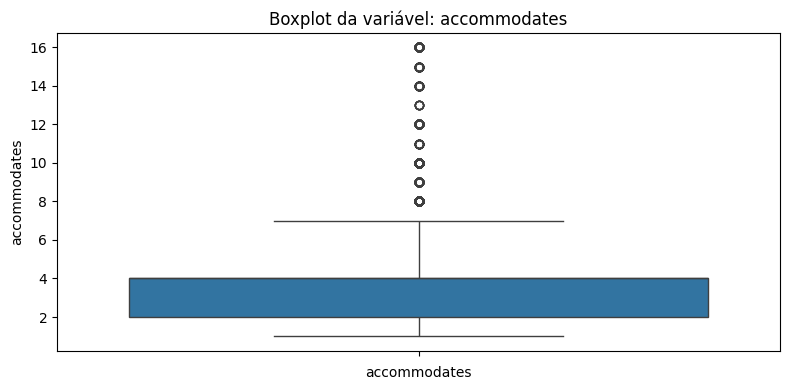

In [18]:
coluna = 'accommodates'

plt.figure(figsize=(8, 4))
sns.boxplot(y=df_plot[coluna])
plt.title(f'Boxplot da variável: {coluna}')
plt.xlabel(coluna)
plt.tight_layout()
plt.show()

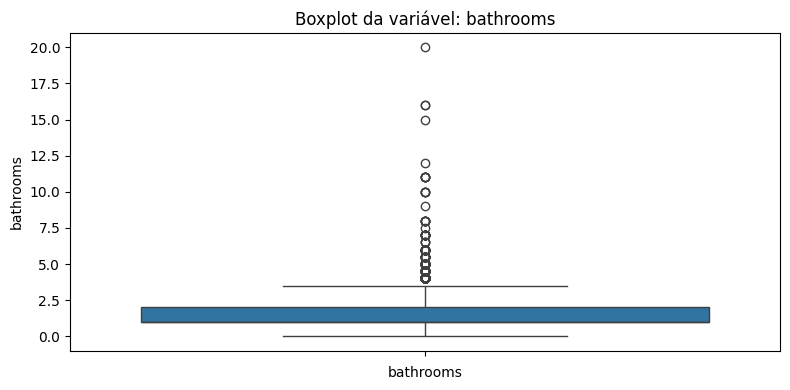

In [19]:
coluna = 'bathrooms'

plt.figure(figsize=(8, 4))
sns.boxplot(y=df_plot[coluna])
plt.title(f'Boxplot da variável: {coluna}')
plt.xlabel(coluna)
plt.tight_layout()
plt.show()

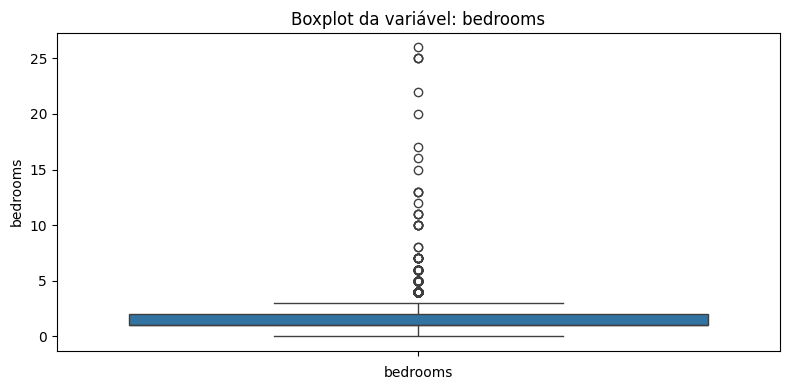

In [20]:
coluna = 'bedrooms'

plt.figure(figsize=(8, 4))
sns.boxplot(y=df_plot[coluna])
plt.title(f'Boxplot da variável: {coluna}')
plt.xlabel(coluna)
plt.tight_layout()
plt.show()

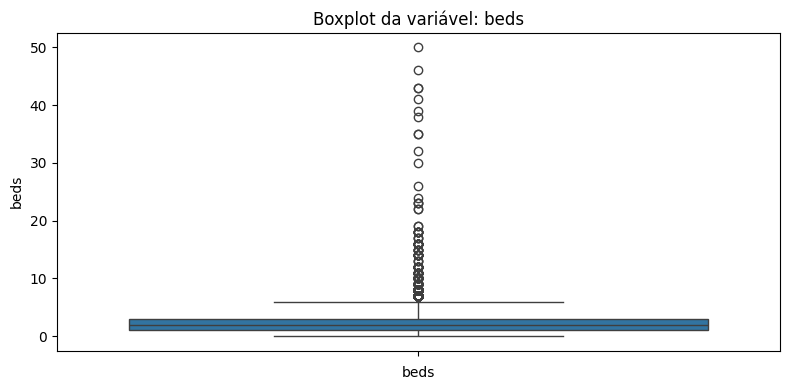

In [21]:
coluna = 'beds'

plt.figure(figsize=(8, 4))
sns.boxplot(y=df_plot[coluna])
plt.title(f'Boxplot da variável: {coluna}')
plt.xlabel(coluna)
plt.tight_layout()
plt.show()

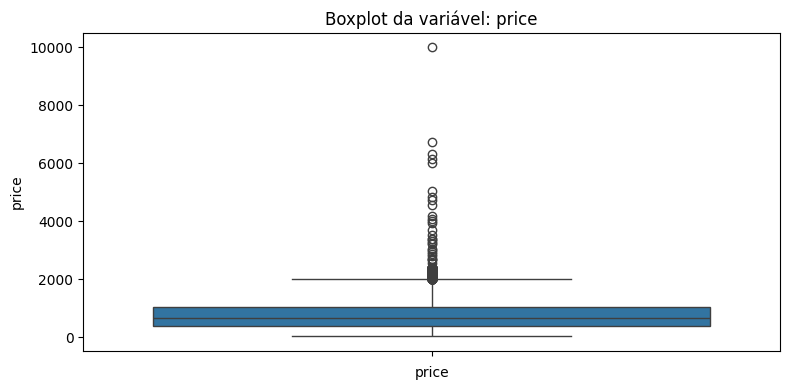

In [22]:
coluna = 'price'

plt.figure(figsize=(8, 4))
sns.boxplot(y=df_plot[coluna])
plt.title(f'Boxplot da variável: {coluna}')
plt.xlabel(coluna)
plt.tight_layout()
plt.show()

Nota que todas as colunas existem valores fora do limite superior do boxplot, ou seja, este comportamento indica a presença de outliers na base de dados.

Vamos tratar esse outlier utilizando o método da própria construção do boxplot, ou seja, vamos calcular o Q1 e Q3 verificar a distancia interquartílica IQR e então definir o limites inferior como: LI = Q1 - 1.5 * IQR, em que IQR = Q3-Q1 e também calcular o limite superior: LF = Q3 + 1.5 * IQR e então valores abaixo de LI e LF serão desconsiderados.

In [23]:
df_tratado = df_final.copy()

col_number = df_final.select_dtypes(include='number').drop(columns=['id', 'review_scores_rating']).columns

for col in col_number:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_tratado = df_tratado[
        (df_tratado[col] >= limite_inferior) &
        (df_tratado[col] <= limite_superior)
    ]



,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
1,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32,5.0
3,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5,5.0


## **Etapa 04 Transformando Dados Categóricos**
Nesta etapa vamos transformar a variavel room_type em variável categórica.

In [43]:
df_tratado['room_type'] = df_tratado['room_type'].astype('category').cat.codes
df_tratado.head(2)


,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type_cat
1,272631,Copacabana,2,2,1.0,1.0,2.0,1146.0,32,5.0,2
3,273363,Santa Teresa,2,1,1.0,1.0,1.0,61.0,5,5.0,2


## **Etapa 05  Conferindo Resultado Final**

Nesta etapa vamos normalizar e conferir os resultados do data.frame final

In [44]:
col_normalize = df_tratado.select_dtypes(include='number').columns.difference(['id', 'room_type'])
df_normalize = df_tratado.copy()
for col in col_normalize:
    df_normalize[col] = (df_tratado[col] - df_tratado[col].min()) / (df_tratado[col].max() - df_tratado[col].min())


In [47]:
(df_normalize.head(5)).round(2)

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
1,272631,Copacabana,2,0.17,0.29,0.33,0.33,0.56,0.51,1.00
3,273363,Santa Teresa,2,0.00,0.29,0.33,0.17,0.01,0.08,1.00
5,273496,Leblon,0,0.83,0.71,0.67,0.83,0.34,0.95,0.96
6,273753,Santa Teresa,2,0.00,0.29,0.33,0.17,0.01,0.06,0.90
7,274116,Santa Teresa,0,0.33,0.29,0.33,0.33,0.10,0.76,0.98


Finalizamos todas as etapas e realizando um head() é possível notar que o conjunto de dados esta normalizado e pronto para utilização de modelos de machine learning. Colunas como id e room_type não foram normalizada por conta de sua natureza id é um identificador e room_type é variável categórica